In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('/content/AirPassengers.csv')

In [27]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [29]:
df.shape

(144, 2)

In [30]:
df['Month']=pd.to_datetime(df['Month'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [32]:
df.set_index('Month',inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [34]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
df=df.sort_values('Month',ascending=True)

In [36]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


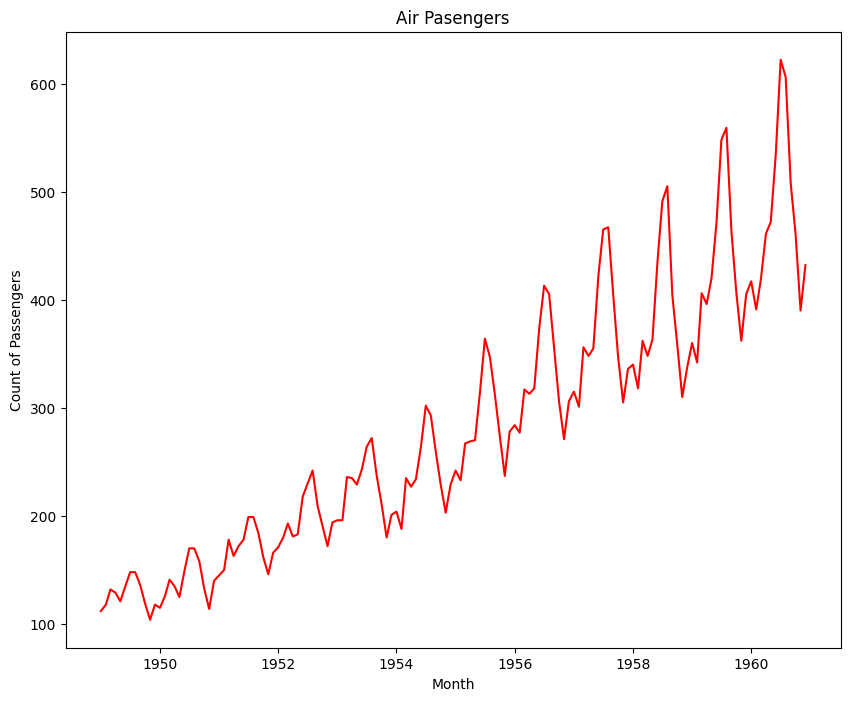

In [37]:
plt.figure(figsize=(10,8))
plt.plot(df['#Passengers'],color='Red')
plt.title('Air Pasengers')
plt.xlabel('Month')
plt.ylabel('Count of Passengers')
plt.show()

From this we can understand the count of paasengers keeps increasing every month.

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['#Passengers'],model='multiplicative', period=30)

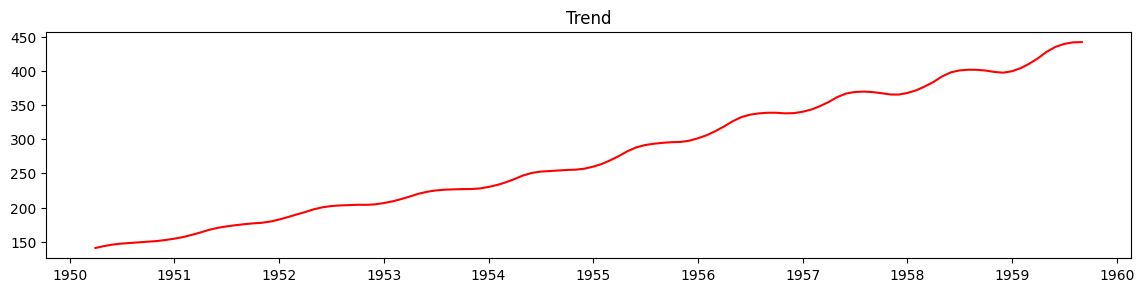

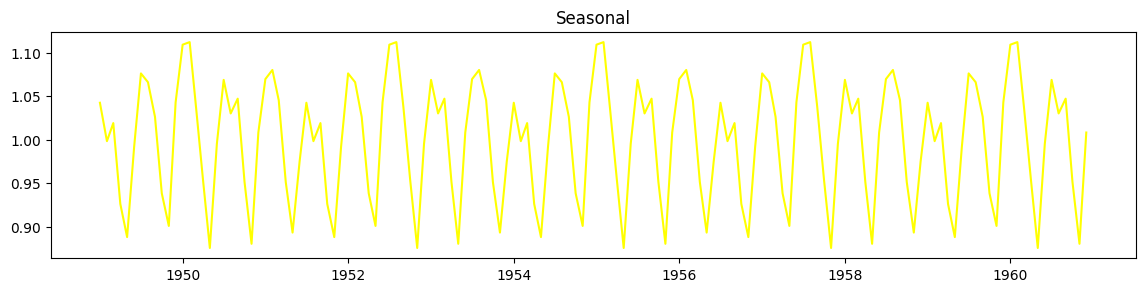

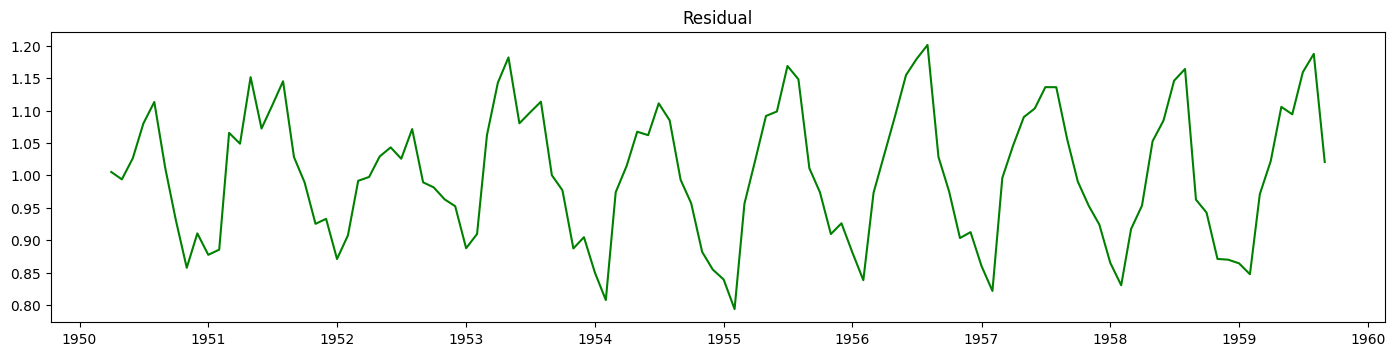

In [39]:
plt.figure(figsize=(14, 10))
plt.subplot(3,1,1)
plt.plot(result.trend,color='Red')
plt.title("Trend")

plt.figure(figsize=(14, 10))
plt.subplot(3,1,2)
plt.plot(result.seasonal,color='Yellow')
plt.title("Seasonal")

plt.figure(figsize=(14, 10))
plt.subplot(3,1,3)
plt.plot(result.resid,color='Green')
plt.title("Residual")

plt.tight_layout()
plt.show()

### There is some noise in data and the trend is upward trend and also its a seasonal data.

In [40]:
##Check for Stationarity:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['#Passengers'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


In [41]:
rolling_mean=df['#Passengers'].rolling(window=30).mean()
rolling_std=df['#Passengers'].rolling(window=30).std()

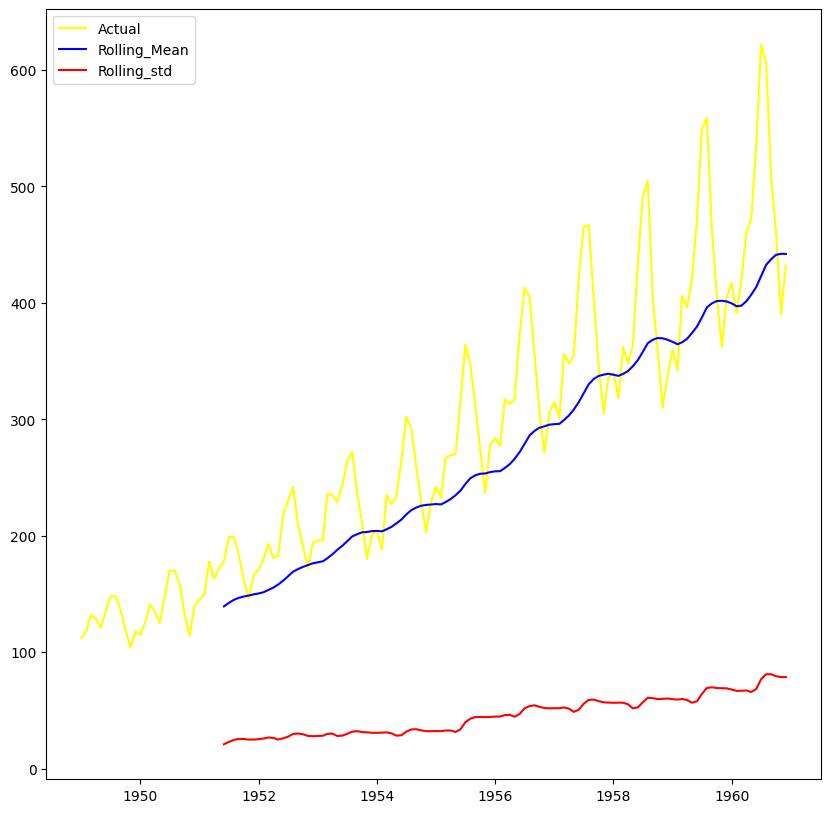

In [42]:
plt.figure(figsize=(10,10))
plt.plot(df['#Passengers'],label="Actual",color='Yellow')
plt.plot(rolling_mean,label="Rolling_Mean",color='Blue')
plt.plot(rolling_std,label="Rolling_std",color='Red')
plt.legend()
plt.show()

### From the above adfuller test then p value is greater than 0.05 so the data is not stationary and from the above graph we can find that rolling mean and rolling standard deviation is not constant so its not stationary so we need to difference the data.

In [43]:
df['Diff1']=df["#Passengers"]-df['#Passengers'].shift(1)

In [47]:
df.dropna(inplace=True)

In [48]:
df.head()

,#Passengers,Diff1
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0


In [49]:
result=adfuller(df['Diff1'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478


In [50]:
df['Diff2']=df["#Passengers"]-df['#Passengers'].shift(2)

In [52]:
df.dropna(inplace=True)

In [53]:
result=adfuller(df['Diff2'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.9414812512932156
p-value: 0.04073257688675971


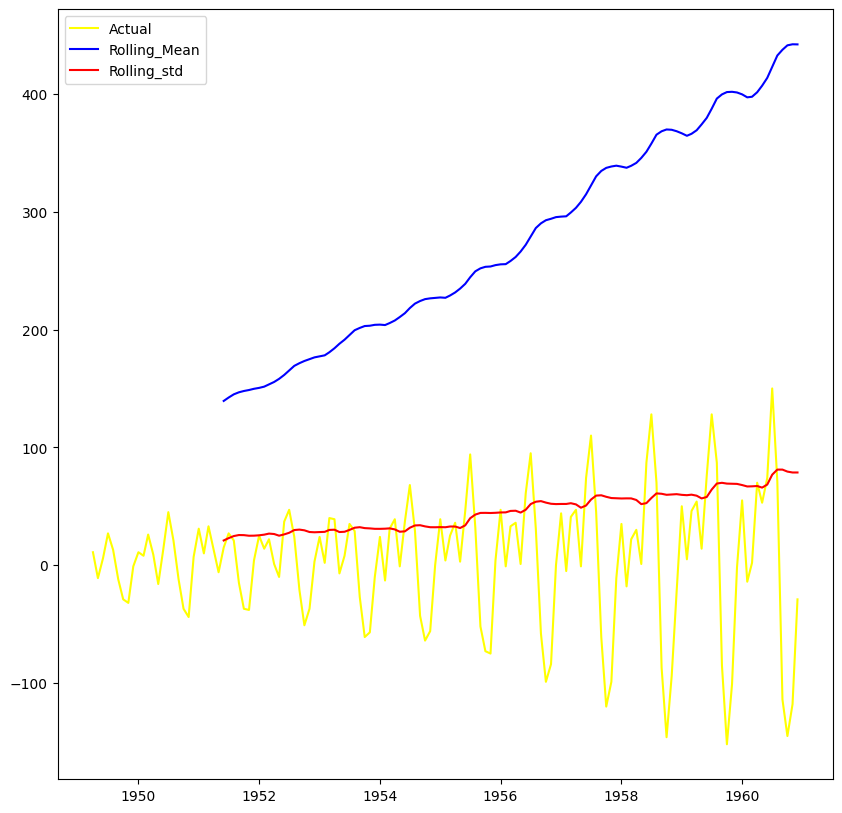

In [54]:
plt.figure(figsize=(10,10))
plt.plot(df['Diff2'],label="Actual",color='Yellow')
plt.plot(rolling_mean,label="Rolling_Mean",color='Blue')
plt.plot(rolling_std,label="Rolling_std",color='Red')
plt.legend()
plt.show()

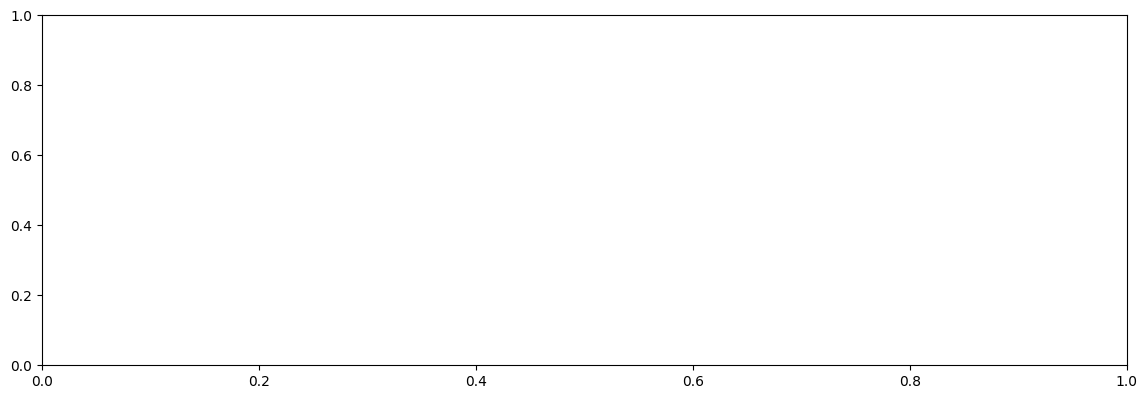

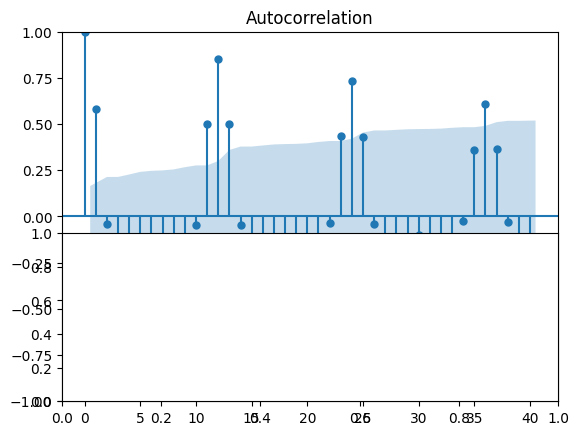

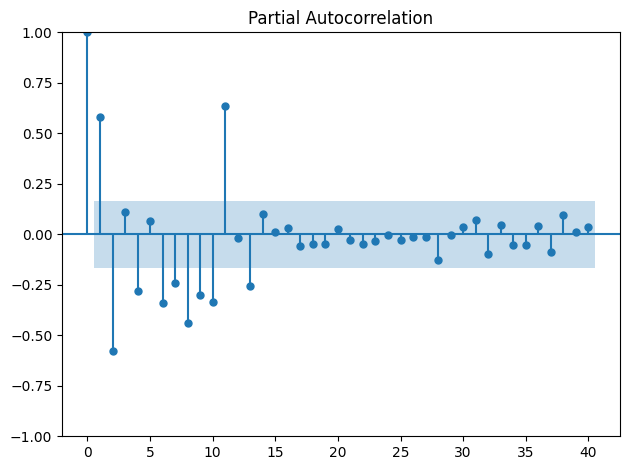

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
plot_acf(df['Diff2'],lags=40)

plt.subplot(2,1,2)
plot_pacf(df['Diff2'],lags=40,method='ywm')

plt.tight_layout()
plt.show()

In [56]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 14.0 MB/s eta 0:00:00


In [59]:
from pmdarima import auto_arima
auto_model = auto_arima(df['#Passengers'],
                        start_p=0, start_q=0,
                        max_p=10, max_q=10,
                        d=2,
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1424.714, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1421.281, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1422.725, Time=0.05 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1414.634, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=1412.515, Time=0.32 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=1394.670, Time=0.20 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=1395.070, Time=0.20 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=1392.676, Time=0.10 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1410.516, Time=0.08 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=1393.075, Time=0.13 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0

In [60]:
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(df['#Passengers'],order=(4,2,0))
arima_model=arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  141
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -691.338
Date:                Mon, 15 Dec 2025   AIC                           1392.676
Time:                        10:55:09   BIC                           1407.349
Sample:                    04-01-1949   HQIC                          1398.639
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3487      0.097     -3.588      0.000      -0.539      -0.158
ar.L2         -0.4143      0.097     -4.291      0.000      -0.604      -0.225
ar.L3         -0.2750      0.072     -3.833      0.0

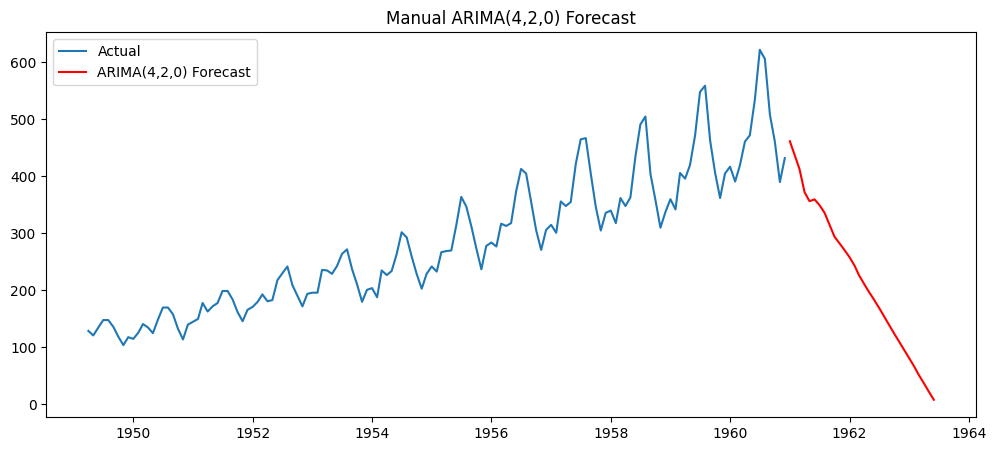

In [61]:
arima_forecast=arima_model.forecast(steps=30)
plt.figure(figsize=(12,5))
plt.plot(df['#Passengers'], label='Actual')
plt.plot(arima_forecast.index, arima_forecast.values, label='ARIMA(4,2,0) Forecast', color='red')
plt.title("Manual ARIMA(4,2,0) Forecast")
plt.legend()
plt.show()


In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarimax_model = SARIMAX(df['#Passengers'],
                        order=(4,2,0),
                        seasonal_order=(1,1,1,12))

sarimax_result = sarimax_model.fit()

print(sarimax_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          #Passengers   No. Observations:                  141
Model:             SARIMAX(4, 2, 0)x(1, 1, [1], 12)   Log Likelihood                -507.342
Date:                              Mon, 15 Dec 2025   AIC                           1028.685
Time:                                      10:59:33   BIC                           1048.594
Sample:                                  04-01-1949   HQIC                          1036.774
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0380      0.092    -11.300      0.000      -1.218      -0.858
ar.L2         -0.72

1961-01-01    432.297950
1961-02-01    402.629988
1961-03-01    429.660897
1961-04-01    457.285330
1961-05-01    463.533222
1961-06-01    509.860802
1961-07-01    590.656391
1961-08-01    566.163650
1961-09-01    461.874511
1961-10-01    405.458135
1961-11-01    325.745591
1961-12-01    360.366159
1962-01-01    349.417042
1962-02-01    310.635700
1962-03-01    323.612762
1962-04-01    344.553555
1962-05-01    341.922833
1962-06-01    385.933930
1962-07-01    457.715502
1962-08-01    424.724529
1962-09-01    309.163260
1962-10-01    246.292882
1962-11-01    157.786245
1962-12-01    183.567732
1963-01-01    166.853716
1963-02-01    120.337309
1963-03-01    130.801141
1963-04-01    141.438593
1963-05-01    131.094901
1963-06-01    160.541572
Freq: MS, Name: predicted_mean, dtype: float64


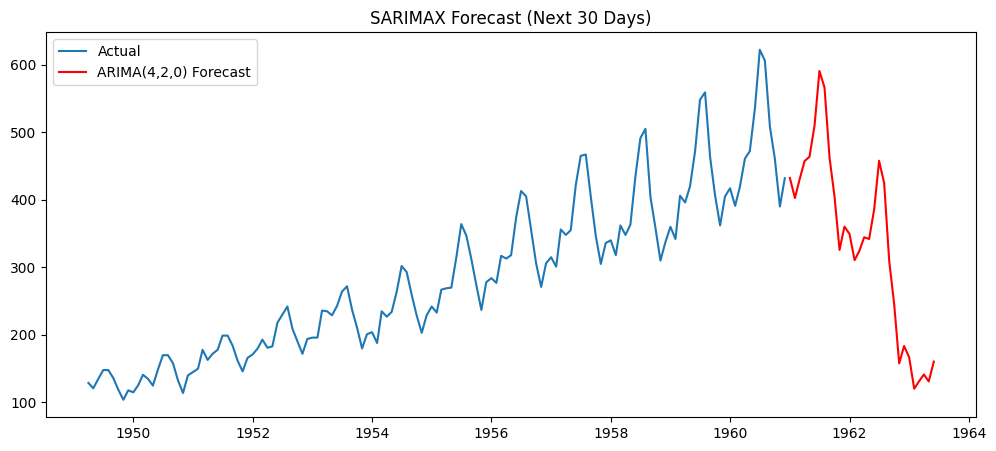

In [65]:
sarimax_forecast=sarimax_result.forecast(steps=30)
print(sarimax_forecast)
plt.figure(figsize=(12,5))
plt.plot(df['#Passengers'], label='Actual')
plt.plot(sarimax_forecast.index, sarimax_forecast.values, label='ARIMA(4,2,0) Forecast', color='red')
plt.title("SARIMAX Forecast (Next 30 Days)")
plt.legend()
plt.show()


In [68]:
## LSTM:
Pass_data=df['#Passengers'].values
Pass_data=Pass_data.reshape(-1,1)
Pass_data[:5]

array([[129],
       [121],
       [135],
       [148],
       [148]])

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Pass_data=scaler.fit_transform(Pass_data)
Pass_data[:5]

array([[0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208]])

In [72]:
X=[]
Y=[]
window=60

for i in range(window,len(Pass_data)):
  X.append(Pass_data[i-window:i])
  Y.append(Pass_data[i])

X=np.array(X)
Y=np.array(Y)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (81, 60, 1)
Y shape: (81, 1)


In [73]:
split=int(0.8*len(X))
X_train=X[:split]
X_test=X[split:]

Y_train=Y[:split]
Y_test=Y[split:]

print("Train shape:", X_train.shape, Y_train.shape)
print("Test shape:", X_test.shape, Y_test.shape)

Train shape: (64, 60, 1) (64, 1)
Test shape: (17, 60, 1) (17, 1)


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,LSTM

In [81]:
lstm_model=Sequential()

lstm_model.add(LSTM(100,return_sequences=True,input_shape=(60,1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(70, return_sequences=False))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(1))

In [82]:
from sklearn.metrics import mean_squared_error
lstm_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [83]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=lstm_model.fit(X_train,Y_train,epochs=20,batch_size=32,validation_split=0.1,callbacks=[early_stop],verbose=1)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 570ms/step - loss: 0.1751 - mean_squared_error: 0.1751 - val_loss: 0.1696 - val_mean_squared_error: 0.1696
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0682 - mean_squared_error: 0.0682 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0475 - val_mean_

In [84]:
lstm_predictions = lstm_model.predict(X_test)
predicted_prices = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(Y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


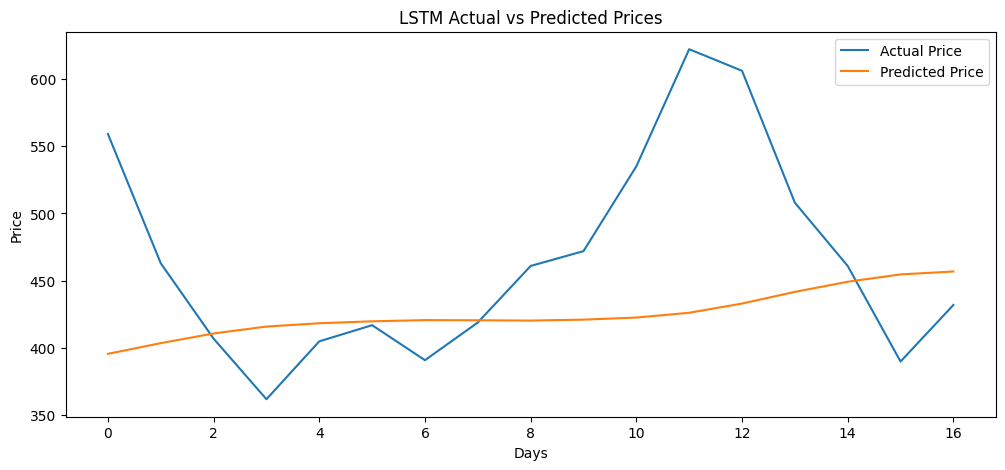

In [85]:
plt.figure(figsize=(12,5))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("LSTM Actual vs Predicted Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()